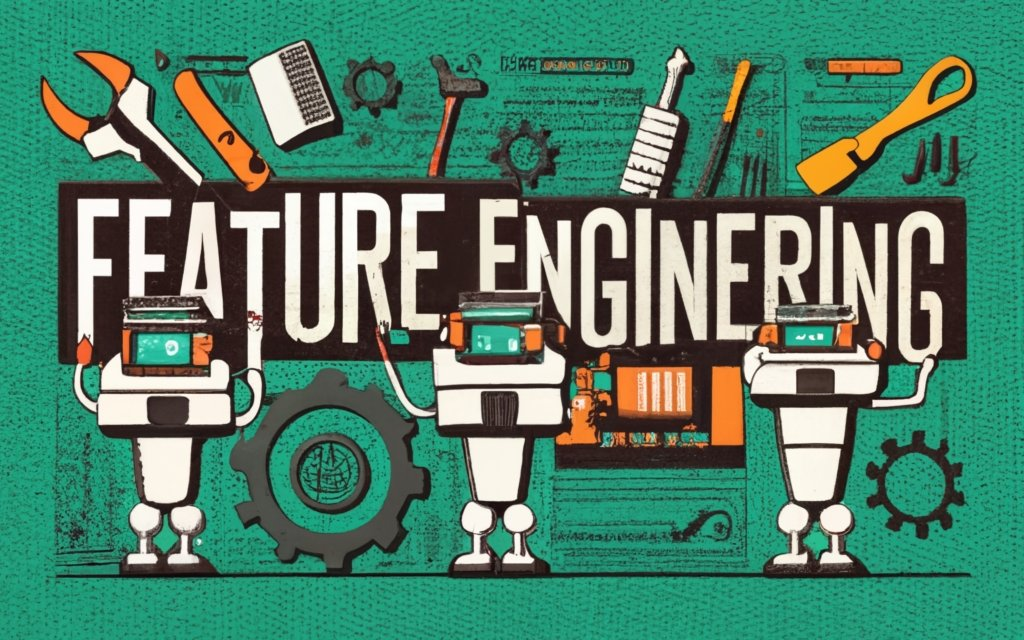

### Feature Engineering Part 2: Exploring Advanced Tecnhiques

## Cont.Table Of Contents

4.Feature Selection 
  - 4.1 why Feature Selection Matters
  
  
  - 4.2 Types of Feature Selection
  
  
  - 4.3 Filter Methods
    - Variance Threshold
    - SelectKBest
    - SelectPercentile
    - GenericUnivariateSelect
    
    
  - 4.4 Wrapper Methods
    - RFE
    - RFECV
    - SelectFromModel
    - SequentialFeatureSelector
    

## 4. Feature Selection Techniques

### 4.1 Why Feature Selection Matters?

In the real data, not all features are of equal importance. Some might be irrelevant, redundant, or noisy. Feature selection helps in choosing the most relevant features, which can lead to faster training times, improved model performance, reduce  models, and better generalization.


However, it's essential to balance feature selection with the risk of losing potentially valuable information. Removing important features can lead to a loss of crucial insights and might result in a less accurate or less robust model. Therefore, it's crucial to carefully evaluate the trade-offs when performing feature selection in machine learning tasks.


Scikit Learn provides `sklearn.feature_selection` API to accomplish this task efficiently.
 



### 4.2 Types of Feature Selection

Feature selection can be approached in several ways:

**Filter Methods:** These methods rely on statistical measures to assign a score to each feature. Common techniques include correlation coefficient scores, chi-squared test, and mutual information. Features are selected based on predefined criteria, such as a certain threshold score.

**Wrapper Methods:** These methods involve the use of a specific machine learning algorithm to evaluate the performance of a model with different subsets of features. It's an iterative process where different combinations of features are used to train models, and the performance is evaluated to select the best feature subset.

**Embedded Methods:** These methods incorporate feature selection as part of the model training process. Some machine learning algorithms, like Lasso (L1 regularization) and tree-based algorithms, inherently perform feature selection by assigning zero weights to irrelevant features during model training.

### 4.3 Filter Methods

#### Variance Threshold

AS the name suggests, Variance Threshold is a simple technique that removes all features whose variance doesn't meet a certain threshold. This method operates on numerical features and is particularly useful for datasets where low-variance features are considered uninformative or noisy.

We can use `VarianceThreshold` method from `sklearn.feature_selection` module  to accomplish this task, and by default it removes a feature which has same value, that is zero variance.

In [1]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_breast_cancer

# Load the breast cancer dataset from scikit-learn
data = load_breast_cancer()
X, y = data.data, data.target

# Convert the data to a DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [2]:
from sklearn.feature_selection import VarianceThreshold

# Define the variance threshold value
threshold_value = 0.1

# Initialize the Variance Threshold object
selector = VarianceThreshold(threshold=threshold_value)

# Fit the selector to the data
X_filtered = selector.fit_transform(X)

# Print the shape of the original and filtered data
print("Original Data Shape:", X.shape)
print("Filtered Data Shape:", X_filtered.shape)

Original Data Shape: (569, 30)
Filtered Data Shape: (569, 11)


By applying the Variance Threshold method to the breast cancer dataset, you can observe how it filters out low-variance ( less than 0.1) features and brings down the features from 30 to 11, however we have to do further investigation as to observe if we lost any important features.

#### Univariate Feature Selection

Univariate feature selection is a type of feature selection method that selects the best features based on univariate statistical tests. It works by selecting the features that have the strongest relationship with the target variable. This approach assesses each feature individually and independently to determine its strength in relation to the target variable, without considering the interaction between features.

**Univariate feature selection is based on the following key steps:**

**Scoring Features:** It involves using statistical tests like chi-squared test, ANOVA F-test, or mutual information to score the features individually.

**Ranking Features:** Based on the scores obtained from the statistical tests, the features are ranked in order of their significance or importance.

**Selecting Features:** The top-k ranked features are then selected for further analysis or model building.

**Scikit-learn Implementation:** Scikit-learn provides several methods for univariate feature selection, including `SelectKBest`, `SelectPercentile`, and `GenericUnivariateSelect`. 

- Each API need a scoring function to score each feature, we can choose from 3 classes of scoring functions such as `Mutual Information(MI)`,`chi-square`, and `F-statistics`.


- MI And F-statistics can be used in both classification and regression problems, by using the methods `mutual_info_regression`,`mutual_info_classif`, `f_regression`, and `f_classif`.


- Chi-square can be used only in classification problems, by using `chi2`


- sklearn provides one more class of univariate feature selection methods that work on common univariate statistical tests for each feature such as `SelectFpr`,`SelectFdr`, and `SelectFwe`


- SelectFpr selects features based on a false positive rate test.


- SelectFdr selects features based on an estimated false discovery rate.


- SelectFwe selects features based on family-wise error rate

### SelectKBest

SelectKBest is a univariate feature selection method that selects the top K features based on their scores. It allows you to choose a specific number of features that exhibit the strongest relationship with the target variable.

In [3]:
from sklearn.datasets import load_breast_cancer

# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

In [4]:
X.shape

(569, 30)

30 features.

In [5]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [6]:
from sklearn.feature_selection import SelectKBest, chi2

# Initialize SelectKBest with the desired configuration
selector = SelectKBest(score_func=chi2, k=20)

# Fit the selector to the data
X_new = selector.fit_transform(X, y)

# Get the support mask, which indicated the selected features.
support = selector.get_support()

# Display the selected columns
selected_columns = [column for column, is_selected in zip(data.feature_names, support) if is_selected]
print("Selected Columns:")
print(selected_columns)

Selected Columns:
['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean compactness', 'mean concavity', 'mean concave points', 'radius error', 'perimeter error', 'area error', 'compactness error', 'concavity error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry']


In [7]:
# Another appraoch to get the same, if the above is confusing.
from sklearn.feature_selection import SelectKBest, chi2

### Apply SelectKBest Algorithm
selector = SelectKBest(score_func=chi2,k=20)
selector.fit(X,y)

dfscores=pd.DataFrame(selector.scores_,columns=["Score"])
dfcolumns=pd.DataFrame(data.feature_names)

features_rank=pd.concat([dfcolumns,dfscores],axis=1)

features_rank.columns=['Features','Score']
features_rank.nlargest(20,'Score')['Features'].values

array(['worst area', 'mean area', 'area error', 'worst perimeter',
       'mean perimeter', 'worst radius', 'mean radius', 'perimeter error',
       'worst texture', 'mean texture', 'worst concavity', 'radius error',
       'mean concavity', 'worst compactness', 'worst concave points',
       'mean concave points', 'mean compactness', 'worst symmetry',
       'concavity error', 'compactness error'], dtype=object)

Now we got the top 20 important features using SelectKBest

### SelectPercentile

SelectPercentile is similar to SelectKBest but selects the top features based on a specified percentage of the highest scores. This is helpful when you want to maintain a certain proportion of the most relevant features. we can implement in the same way as SelectKBest, just that you need to use the percentile parameter to specify the percentile threshold, `selector = SelectKBest(score_func=chi2, k=no of features to select)` 

### GenericUnivariateSelect 
This method is a versatile feature selection tool that allows you to perform univariate feature selection with configurable strategies. It provides various options for setting the mode of operation, which enables you to customize the feature selection process based on your specific requirements. We can implement it same way as SelectKBest, by using `GenericUnivariateSelect(score_func=f_classif, mode='percentile', param=no of features to select)`. As for mode, default is percentile, you have various other options as `k_best`,`fpr`,`fdr`, and `fwe`.

**Note:** Make sure to not use regression feature scoring function with a classification problem, It will lead to useless results.

### 4.4 Wrapper Based Filter Selection

These methods involve the use of a specific machine learning algorithm to evaluate the performance of a model with different subsets of features. 

### Recursive Feature Elimination (RFE)

Recursive Feature Elimination (RFE) is a feature selection technique that works by recursively considering smaller and smaller sets of features.

**Model Training:** RFE begins by training a model on the entire set of features and ranks the features based on their importance derived from the model.


**Feature Elimination:** It then eliminates the least important feature(s) and retrains the model on the remaining features.


**Recursive Process:** This process is repeated recursively, with the least important features continuously being eliminated until the desired number of features is reached.


**Optimization:** RFE aims to find the optimal feature subset that maximizes model performance based on a specified metric.


**Scikit-learn Implementation:** Scikit-learn provides the `RFE` method that can be used with various estimators to perform recursive feature elimination.

In [8]:
from sklearn.datasets import load_breast_cancer

# Load the breast cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target
feature_names = data.feature_names

In [9]:
X.shape

(569, 30)

In [10]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVC

# Initialize the SVM classifier
estimator = SVC(kernel="linear")

# Initialize the RFE with the estimator and desired number of features
selector = RFE(estimator, n_features_to_select=10, step=1)

# Fit the selector to the data
selector = selector.fit(X, y)

# Display the ranking of the features
print("Feature Ranking: ", selector.ranking_)

Feature Ranking:  [ 1 12  7 21  4  3  1  1  2 18 16  1  5 13 14 10  9 11 19 17  1  6 15 20
  1  1  1  1  1  8]


So this is the ranking for the columns based on the svm classifier. we will be selecting the features corresponding to the top 10 ranks. When step is set to 1, it means that one feature will be eliminated at each iteration until the specified stopping criterion is met. 

In [11]:
# Get the support mask
support = selector.support_

# Display the selected column names
selected_columns = [feature_names[i] for i in range(len(feature_names)) if support[i]]
print("Selected Columns:")
print(selected_columns)

Selected Columns:
['mean radius', 'mean concavity', 'mean concave points', 'texture error', 'worst radius', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry']


In this example:

- We initialize the SVC (Support Vector Classifier) estimator.
- Then initialize the RFE with the SVC estimator and specify the desired number of features to select.
- And fit the selector to the dataset X and the target y.
- Finally, we display the ranking of the features, indicating their importance based on the RFE process.

RFE can be effective when dealing with complex feature spaces where the relationship between features and the target variable is not apparent, as it can systematically eliminate less important features to reveal the most relevant ones.

### Recursive Feature Elimination with Cross-Validation (RFECV)

- It can get difficult to choose the correct number of features, So use RFECV if we do not want to specify the desired number of features in RFE.

- RFECV Performs RFE in a cross validation loop to find the optimal number of features.

In [12]:
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.svm import SVC

# Initialize the SVM classifier
estimator = SVC(kernel="linear")

# Initialize the RFECV with the estimator and cross-validation generator
rfecv = RFECV(estimator, step=1, cv=StratifiedKFold(5), scoring='accuracy')

# Fit the RFECV to the data
rfecv.fit(X, y)

# Get the support mask
support = rfecv.support_

# Get the selected column names
selected_columns = [data.feature_names[i] for i in range(len(data.feature_names)) if support[i]]
print(f"Selected {len(selected_columns)} Columns:")
print(selected_columns)

Selected 14 Columns:
['mean radius', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'texture error', 'perimeter error', 'worst radius', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry']


Until now we have been selecitng 20 columns, but through RFECV we got to know 14 columns would be a wise choice. We can do further invesigation to confirm on this.

### Select From Model

SelectFromModel Selects desired number of important features above certain threshold of feature importances as obtained from the trained estimator. 

**Model Training:** First, you train a model on the entire set of features.

**Feature Importance:** After training the model, you can extract feature importances, coefficients, or weights from the model, depending on the type of model used.

**Thresholding:** The threshold can be specified either numerically or through string argument based on built in heuristics such as `mean`,`median`.

**Selecting Features:** Features with importance scores above the threshold are selected, while the rest are discarded.

**Scikit-learn Implementation:** Scikit-learn provides the SelectFromModel class that can be used with various models, including linear models, tree-based models, and others.

In [13]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC

# Load the breast cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Initialize the Linear SVM classifier
estimator = LinearSVC(C=0.01, penalty="l1", dual=False)

# Initialize SelectFromModel with the estimator and the threshold
selector = SelectFromModel(estimator, threshold='mean')

# Fit the selector to the data
selector = selector.fit(X, y)

# Get the support mask
support = selector.get_support()

# Display the selected column names
selected_columns = [data.feature_names[i] for i in range(len(data.feature_names)) if support[i]]
print("Selected Columns:")
print(selected_columns)


Selected Columns:
['mean perimeter', 'area error', 'worst texture', 'worst area']


C:\Users\raviteja\anaconda3\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


you may need to adjust the threshold based on the feature importances provided by the specific model you are using.

### Sequential Feature Selection

- Performs feature selection by selecting or deselecting features one by one in a greedy manner. It uses two approaches.


- **Forward Selection:** This approach starts with an empty feature set and at each iteration adds the feature that maximizes some criterion. It stops when the desired number of features is reached.

 
- **Backward Selection:** This approach starts with the full feature set and at each iteration removes the feature that contributes the least to the criterion. It stops when the desired number of features is reached.


- Use sfs by importing `SequentialFeatureSelector `, you can use the `direction` parameter to control whether forward or backward SFS to be used. And they don't give the equivalent results.


- SFS may be slower than RFE and SelectFromModel as it needs to evaluate more models compared to the other two approaches.



### Pricipal Component Analysis(PCA)

Principal Component Analysis (PCA) is a popular dimensionality reduction technique used to transform high-dimensional datasets into a lower-dimensional subspace. It achieves this by identifying the directions (principal components) that capture the most variance in the data, thus allowing the data to be represented with fewer dimensions while preserving the most important information.

In [14]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the breast cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Standardize the feature matrix
X = StandardScaler().fit_transform(X)

# Initialize the PCA with no of features you want
pca = PCA(n_components=10)

# Apply PCA to the standardized feature matrix
principalComponents = pca.fit_transform(X)

# Visualize the variance explained by each principal component
explained_variance = pca.explained_variance_ratio_

# Create a DataFrame for the reduced feature matrix
principalDf = pd.DataFrame(data=principalComponents)

# Concatenate with the target variable to visualize the reduced data
finalDf = pd.concat([principalDf, pd.Series(data.target, name='target')], axis=1)

finalDf

,0,1,2,3,4,5,6,7,8,9,target
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159370,-0.398409,-0.157112,-0.877407,0
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013359,0.240986,-0.711909,1.106987,0
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668167,0.097376,0.024068,0.454282,0
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429910,1.059570,-1.405439,-1.116956,0
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936213,0.636376,-0.263806,0.377705,0
...,...,...,...,...,...,...,...,...,...,...,...
564,6.439315,-3.576817,2.459487,1.177314,-0.074824,-2.375193,-0.596130,-0.035467,0.987924,0.257002,0
565,3.793382,-3.584048,2.088476,-2.506028,-0.510723,-0.246710,-0.716327,-1.113356,-0.105210,-0.108621,0
566,1.256179,-1.902297,0.562731,-2.089227,1.809991,-0.534447,-0.192759,0.341889,0.393915,0.520886,0
567,10.374794,1.672010,-1.877029,-2.356031,-0.033742,0.567936,0.223082,-0.280241,-0.542032,-0.089302,0
